# **Exploratory Data Analysis of Diamond Prices**

> 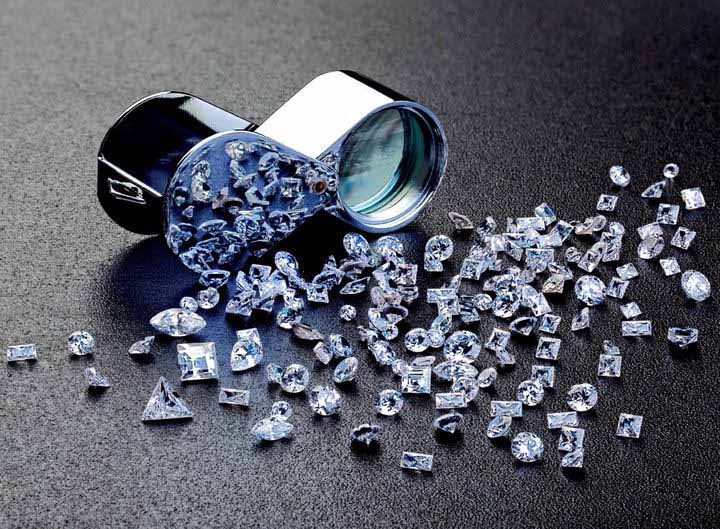

## In this notebook we will do Exploratory Data Analysis of Diamond Prices.

### Basic Highlights:
* We have imported data from Diamond Prices 2022 DataSet.
* We have compared price of diamond with respect to their quality, color and clarity.
* For data visualisation Matplotlib and Seaborn liabraries are used.

### Importing the liabraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Importing the Data Set

In [2]:
df = pd.read_csv("../input/diamonds-prices/Diamonds Prices2022.csv")

In [3]:
df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


### Cleaning the Data

In [4]:
df.rename({"Unnamed: 0":"A"}, axis="columns", inplace=True)
df.drop(["A"], axis=1, inplace=True)

In [5]:
df.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


### Finding null values

In [6]:
df.isna().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

**No null value found**

### Data Visualisation

In [7]:
df.groupby(df["cut"]).count().reset_index()

,cut,carat,color,clarity,depth,table,price,x,y,z
0,Fair,1610,1610,1610,1610,1610,1610,1610,1610,1610
1,Good,4906,4906,4906,4906,4906,4906,4906,4906,4906
2,Ideal,21551,21551,21551,21551,21551,21551,21551,21551,21551
3,Premium,13793,13793,13793,13793,13793,13793,13793,13793,13793
4,Very Good,12083,12083,12083,12083,12083,12083,12083,12083,12083


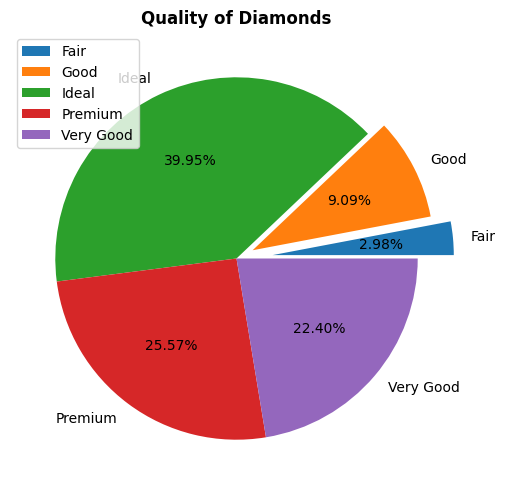

In [8]:
fair = df.loc[df["cut"] == "Fair"].count()[0]
good = df.loc[df["cut"] == "Good"].count()[0]
ideal = df.loc[df["cut"] == "Ideal"].count()[0]
premium = df.loc[df["cut"] == "Premium"].count()[0]
v_good = df.loc[df["cut"] == "Very Good"].count()[0]

plt.figure(figsize = [6,6], dpi = 100)
labels = ["Fair", "Good", "Ideal", "Premium", "Very Good"]
explode = [0.2,0.1,0.0,0.0,0.0]

plt.pie([fair, good, ideal, premium, v_good], labels = labels, explode = explode, autopct = "%0.2f%%")

plt.title("Quality of Diamonds", fontdict = {"fontweight":"bold"})
plt.legend()
plt.show()

### Findings
* **Ideal quality diamonds are highest in numbers, followed by Premium quality.**
* **Fair and Good quality diamonds form smallest number.**

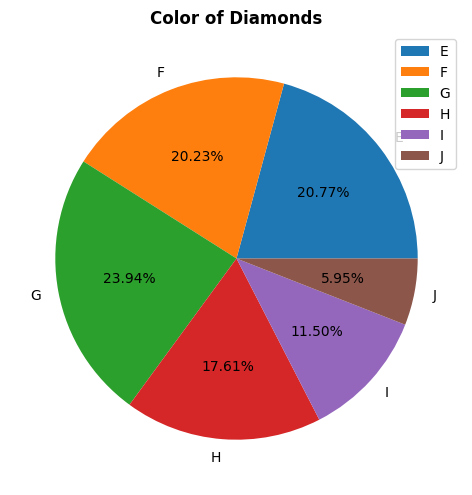

In [9]:
E = df.loc[df["color"] == "E"].count()[0]
F = df.loc[df["color"] == "F"].count()[0]
G = df.loc[df["color"] == "G"].count()[0]
H = df.loc[df["color"] == "H"].count()[0]
I = df.loc[df["color"] == "I"].count()[0]
J = df.loc[df["color"] == "J"].count()[0]

plt.figure(figsize = [6,6], dpi = 100)
labels = ["E", "F", "G", "H", "I", "J"]

plt.pie([E,F,G,H,I,J], labels = labels, autopct = "%0.2f%%")

plt.title("Color of Diamonds", fontdict = {"fontweight":"bold"})
plt.legend()
plt.show()

### Findings
* **E,F,G color diamonds are amost equal in numbers.**
* **J color diamonds are smallest in number i.e. nearly 6%.**

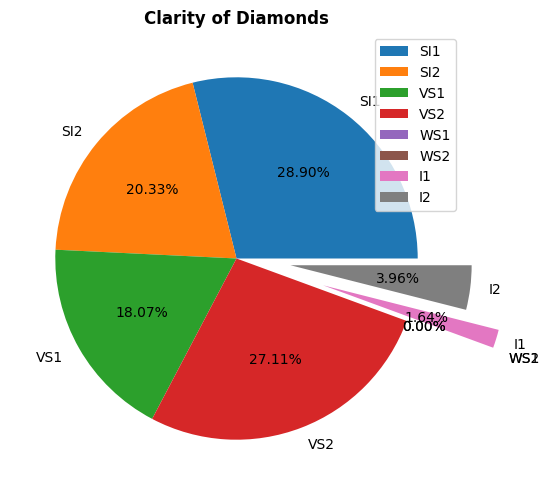

In [10]:
SI1 = df.loc[df["clarity"] == "SI1"].count()[0]
SI2 = df.loc[df["clarity"] == "SI2"].count()[0]
VS1 = df.loc[df["clarity"] == "VS1"].count()[0]
VS2 = df.loc[df["clarity"] == "VS2"].count()[0]
WS1 = df.loc[df["clarity"] == "WS1"].count()[0]
WS2 = df.loc[df["clarity"] == "WS2"].count()[0]
I1 = df.loc[df["clarity"] == "I1"].count()[0]
IF = df.loc[df["clarity"] == "IF"].count()[0]

plt.figure(figsize = [6,6], dpi = 100)
labels = ["SI1", "SI2", "VS1", "VS2", "WS1", "WS2", "I1", "I2"]
explode = [0.0,0.0,0.0,0.0,0.5,0.5,0.5,0.3]

plt.pie([SI1,SI2,VS1,VS2,WS1,WS2,I1,IF], explode = explode, labels = labels, autopct = "%0.2f%%")

plt.title("Clarity of Diamonds", fontdict = {"fontweight":"bold"})
plt.legend()
plt.show()

### Findings
* **SI1 and VS2 are greatest in numbers.**
* **WS1 and WS2 are almost negligible.**

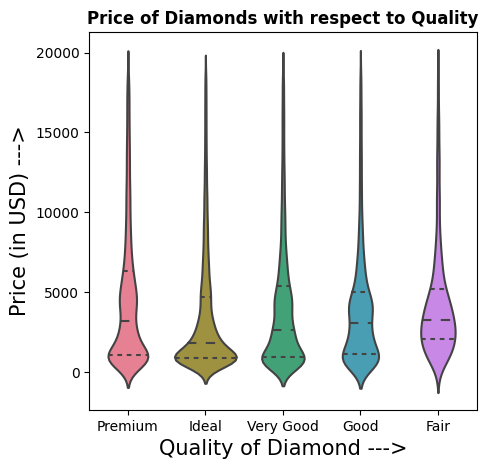

In [11]:
plt.figure(figsize = [5,5], dpi = 100)
sns.violinplot(x = "cut", y = "price", data = df, palette = "husl", inner = "quartile", \
              order = ["Premium", "Ideal", "Very Good", "Good", "Fair"])

plt.title("Price of Diamonds with respect to Quality", fontdict = {"fontweight":"bold"})
plt.xlabel("Quality of Diamond --->", fontdict = {"fontname": "Comic Sans MS", "fontsize": 15})
plt.ylabel("Price (in USD) --->", fontdict = {"fontname": "Comic Sans MS", "fontsize": 15})

plt.show()

### Findings
* **Fair and Good Quality diamonds have higher average price.**
* **But some Premium diamonds are sold at much higher price.**

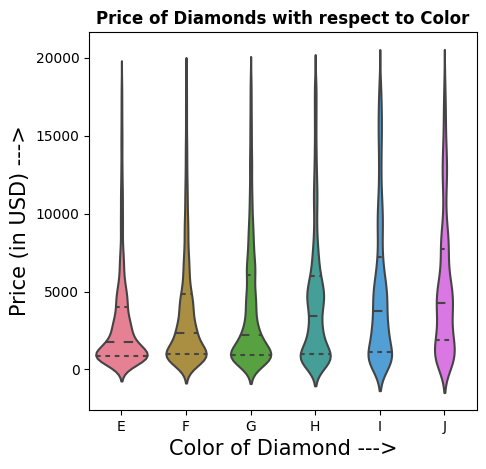

In [12]:
plt.figure(figsize = [5,5], dpi = 100)
sns.violinplot(x = "color", y = "price", data = df, palette = "husl", inner = "quartile", \
              order = ["E", "F", "G", "H", "I", "J"])

plt.title("Price of Diamonds with respect to Color", fontdict = {"fontweight":"bold"})
plt.xlabel("Color of Diamond --->", fontdict = {"fontname": "Comic Sans MS", "fontsize": 15})
plt.ylabel("Price (in USD) --->", fontdict = {"fontname": "Comic Sans MS", "fontsize": 15})

plt.show()

### Findings
* **H, I, J color diamonds have higher average price than others.**
* **J color diamonds have most diverse price range.**

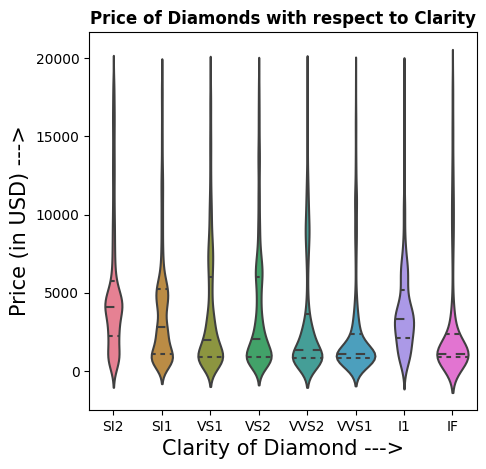

In [13]:
plt.figure(figsize = [5,5], dpi = 100)
sns.violinplot(x = "clarity", y = "price", data = df, palette = "husl", inner = "quartile")

plt.title("Price of Diamonds with respect to Clarity", fontdict = {"fontweight":"bold"})
plt.xlabel("Clarity of Diamond --->", fontdict = {"fontname": "Comic Sans MS", "fontsize": 15})
plt.ylabel("Price (in USD) --->", fontdict = {"fontname": "Comic Sans MS", "fontsize": 15})

plt.show()

### Findings
* **Average price of diamonds with SI2, SI1 and I1 clarity is much higher than others.**

In [14]:
df['binned weight']=pd.cut(x=df['carat'], bins=[0,0.5,1,1.5,2,2.5,3,3.5,4])

In [15]:
df

,carat,cut,color,clarity,depth,table,price,x,y,z,binned weight
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43,"(0.0, 0.5]"
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31,"(0.0, 0.5]"
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31,"(0.0, 0.5]"
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63,"(0.0, 0.5]"
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75,"(0.0, 0.5]"
...,...,...,...,...,...,...,...,...,...,...,...
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74,"(0.5, 1.0]"
53939,0.75,Ideal,D,SI2,62.2,55.0,2757,5.83,5.87,3.64,"(0.5, 1.0]"
53940,0.71,Premium,E,SI1,60.5,55.0,2756,5.79,5.74,3.49,"(0.5, 1.0]"
53941,0.71,Premium,F,SI1,59.8,62.0,2756,5.74,5.73,3.43,"(0.5, 1.0]"


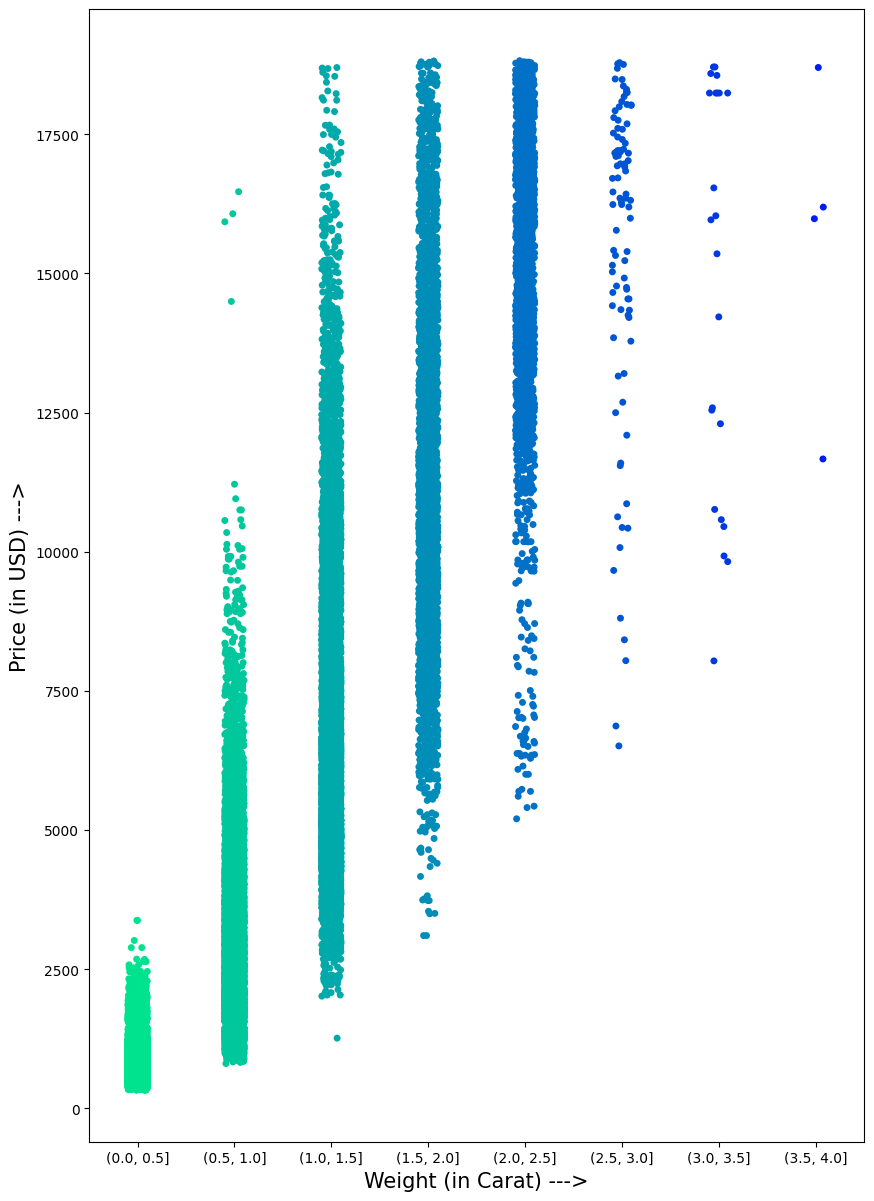

In [16]:
plt.figure(figsize = [10,15], dpi = 100)
sns.stripplot(x = "binned weight", y = "price", data = df, palette = "winter_r", jitter = 1)
plt.xlabel("Weight (in Carat) --->", fontdict = {"fontname": "Comic Sans MS", "fontsize": 15})
plt.ylabel("Price (in USD) --->", fontdict = {"fontname": "Comic Sans MS", "fontsize": 15})

plt.show()

### Findings
* **Diamonds of same Carat have wide price range (depending on other aspects).**
* **Highest price of diamonds at different Carat range becomes steady after 1 Carat of weight.**
* **But the lowest price of diamonds keeps on increasing with respect to weight.**

<Figure size 500x500 with 0 Axes>

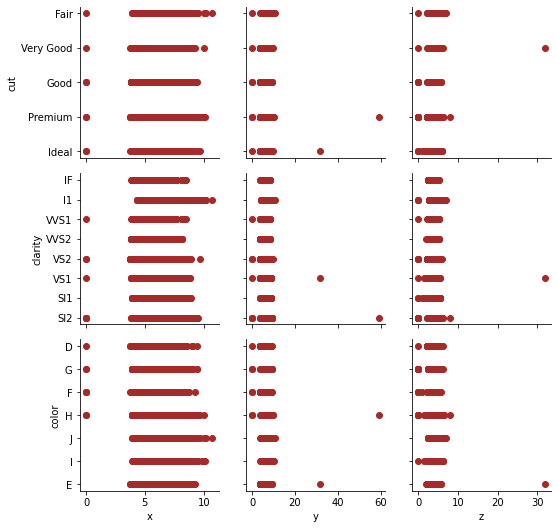

In [17]:
plt.figure(figsize = [5,5], dpi = 100)
x = sns.PairGrid(df, x_vars = ["x", "y", "z"], y_vars = ["cut", "clarity", "color"])
x = x.map_offdiag(plt.scatter, color = "brown")

plt.show()

### Findings
* **Color, Clarity and Cut doesn't depends much on dimensions of diamonds.**
* **Though y and z dimensions are almost same of all diamonds, x dimesion has wider range.**

In [18]:
df.describe()

,carat,depth,table,price,x,y,z
count,53943.000000,53943.000000,53943.000000,53943.000000,53943.000000,53943.000000,53943.000000
mean,0.797935,61.749322,57.457251,3932.734294,5.731158,5.734526,3.538730
std,0.473999,1.432626,2.234549,3989.338447,1.121730,1.142103,0.705679
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.000000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


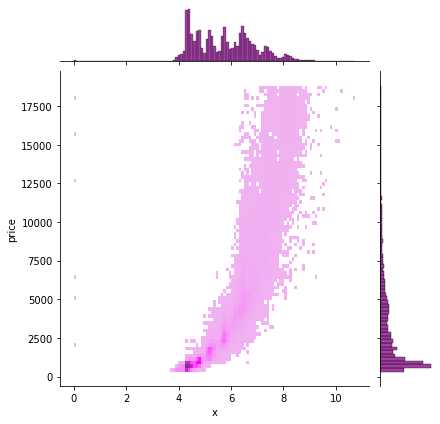

In [19]:
sns.jointplot(x = "x", y = "price", data = df, kind = "hist", color = "purple")

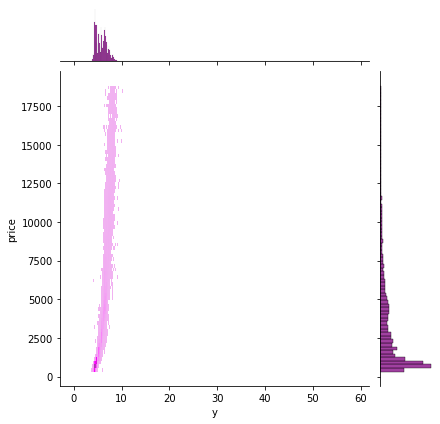

In [20]:
sns.jointplot(x = "y", y = "price", data = df, kind = "hist", color = "purple")

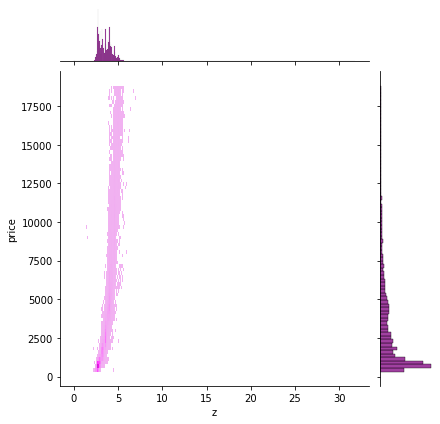

In [21]:
sns.jointplot(x = "z", y = "price", data = df, kind = "hist", color = "purple")

### Findings
* **Price of diamond first remains constant with increase in size of dimension but later price keep on increasing even if dimensions remain same.**